In [1]:
from netCDF4 import Dataset 
import numpy as np 
np.bool = np.bool_
import math
import scipy.stats as stats 
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from scipy import signal
import scipy.io
from scipy import signal
# import seaborn
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn import preprocessing
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis

#from cartopy.util import add_cyclic_point
#import cartopy.crs as ccrs

In [2]:
#filename1 = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/ATM_dm_pl_echr0028_1031.nc'
filename1 = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/ATM_6h_pl_echr0028_103001.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
lat = ncin1.variables['lat'] 
lat = (np.array(lat))
plev = ncin1.variables['lev'] 
plev = (np.array(plev))
t = ncin1.variables['t'] 
t = (np.array(t))
t.shape #u[day,plev,lat,lon]
#print(lat)
print(plev[22]/100)
# print(plev[14]/100) # 50 hPa
# print(plev[12]/100) # 100 hPa
# print(plev[17]/100) # 10 hPa

1.0


In [3]:
ncin1 = Dataset('/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/t/era5_t_1979_04.daily.nc', 'r', format='NETCDF4') 
#lat = ncin1.variables['lat'] 
#lat = (np.array(lat))
# t = ncin1.variables['t'] 
# t = (np.array(t))
level = ncin1.variables['level'] 
level = (np.array(level))
latitude = ncin1.variables['latitude'] 
latitude = (np.array(latitude))
longitude = ncin1.variables['longitude'] 
longitude = (np.array(longitude))
level

array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,
         70.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,
        350.,  400.,  450.,  500.,  550.,  600.,  650.,  700.,  750.,
        775.,  800.,  825.,  850.,  875.,  900.,  925.,  950.,  975.,
       1000.])

In [ ]:

uu  = np.zeros((4,26,96,12))

month = np.array(['01','02','03','04','05','06','07','08','09','10','11','12'])



folder = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/'

for yy in range(30,90):
    md = np.zeros(13)
    ubar  = np.zeros((26,96,12))
    print(yy)
    for mm in range(12):
        #print(mm)
        filename1 = folder+'ATM_6h_pl_echr0028_10'+str(yy)+month[mm]+'.nc'
        ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
        lat = ncin1.variables['lat'] 
        lat = (np.array(lat))
        #plev = ncin1.variables['lev'] 
        #plev = (np.array(plev))

        u = ncin1.variables['u'] 
        u = (np.array(u))
        
        ubar[:,:,mm] = np.mean(np.mean(u,axis=3),axis=0)
        
    uu[0,:,:,:] = uu[0,:,:,:] + ubar/60
    
    

folder = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0029/'

for yy in range(30,90):
    md = np.zeros(13)
    ubar  = np.zeros((26,96,12))
    print(yy)
    for mm in range(12):
        #print(mm)
        filename1 = folder+'ATM_6h_pl_echr0029_10'+str(yy)+month[mm]+'.nc'
        ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
        lat = ncin1.variables['lat'] 
        lat = (np.array(lat))
        #plev = ncin1.variables['lev'] 
        #plev = (np.array(plev))

        u = ncin1.variables['u'] 
        u = (np.array(u))
        
        ubar[:,:,mm] = np.mean(np.mean(u,axis=3),axis=0)
        
    uu[1,:,:,:] = uu[1,:,:,:] + ubar/60



folder = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0060/'

for yy in range(30,90):
    md = np.zeros(13)
    ubar  = np.zeros((26,96,12))
    print(yy)
    for mm in range(12):
        #print(mm)
        filename1 = folder+'ATM_6h_pl_echr0060_10'+str(yy)+month[mm]+'.nc'
        ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
        lat = ncin1.variables['lat'] 
        lat = (np.array(lat))
        #plev = ncin1.variables['lev'] 
        #plev = (np.array(plev))

        u = ncin1.variables['u'] 
        u = (np.array(u))
        
        ubar[:,:,mm] = np.mean(np.mean(u,axis=3),axis=0)
        
    uu[2,:,:,:] = uu[2,:,:,:] + ubar/60
    
    
folder = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0061/'

for yy in range(30,90):
    md = np.zeros(13)
    ubar  = np.zeros((26,96,12))
    print(yy)
    for mm in range(12):
        #print(mm)
        filename1 = folder+'ATM_6h_pl_echr0061_10'+str(yy)+month[mm]+'.nc'
        ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
        lat = ncin1.variables['lat'] 
        lat = (np.array(lat))
        #plev = ncin1.variables['lev'] 
        #plev = (np.array(plev))

        u = ncin1.variables['u'] 
        u = (np.array(u))
        
        ubar[:,:,mm] = np.mean(np.mean(u,axis=3),axis=0)
        
    uu[3,:,:,:] = uu[3,:,:,:] + ubar/60
    
    
    
    
        
filename2 = 'u_allp.nc'

ncin2 = Dataset(filename2, 'w', format='NETCDF4')

#days = np.arange(1,366, 1.0)
#years = np.arange(1,30, 1.0)
mon = ncin2.createDimension('mon', 12)
lat = ncin2.createDimension('lat', 96)
lev = ncin2.createDimension('lev', 26)
simu = ncin2.createDimension('simu', 4)

uwind = ncin2.createVariable('u', 'f4', ('simu','lev','lat','mon'))

uwind[:] = uu
ncin2.close()

In [8]:
ncin1 = Dataset('u_allp.nc', 'r', format='NETCDF4') 
#lat = ncin1.variables['lat'] 
#lat = (np.array(lat))
u = ncin1.variables['u'] 
u = (np.array(u))
u.shape

(4, 26, 96, 12)

In [9]:

up = np.zeros((4,26,96))
upre = np.zeros((4,26,96))
up[:,:,0:48] = (np.mean(u[:,:,0:48,10:12],axis=3)+np.mean(u[:,:,0:48,0:3],axis=3))/2
up[:,:,48:96] = np.mean(u[:,:,48:96,4:9],axis=3)
upre=up[:,:,::-1]


In [10]:
uy = np.zeros((12,37,96))
for i in range(1979,2022):
    ncin1 = Dataset('era5/'+str(i)+'.nc', 'r', format='NETCDF4') 
    u = ncin1.variables['u'] 
    u = (np.array(u))
    uy = uy+np.mean(u,axis=3)/44
    print(i)


1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [11]:
uera=np.zeros((37,96))
uerare=np.zeros((37,96))
uera[:,0:48] = (np.mean(uy[10:12,:,0:48],axis=0)+np.mean(uy[0:3,:,0:48],axis=0))/2
uera[:,48:96] = np.mean(uy[4:9,:,48:96],axis=0)
uera=uera[::-1,:]
uerare = uera[:,::-1]


In [14]:
uu  = np.zeros((366,26,96))

month = np.array(['01','02','03','04','05','06','07','08','09','10','11','12'])


folder = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0001FR/'

for yy in range(1,60):
    
    print(yy)
    
    if yy < 10:
        filename1 = folder + 'ATM_dm_pl_echr0001_100'+str(yy)+'.nc'
    else:
        filename1 = folder + 'ATM_dm_pl_echr0001_10'+str(yy)+'.nc'
        
    ncin1 = Dataset(filename1, 'r', format='NETCDF4')
    lat = ncin1.variables['lat']
    lat = (np.array(lat))
    #plev = ncin1.variables['plev'] 
    #plev = (np.array(plev))

    u = ncin1.variables['u'] 
    u = (np.array(u))
    
    uu[0:u.shape[0],:,:] = uu[0:u.shape[0],:,:] + np.mean(u,axis=3)
    
    

# for yy in range(30,90):
#     md = np.zeros(13)
#     ubar  = np.zeros((26,96,12))
#     print(yy)
#     for mm in range(12):
#         #print(mm)
#         filename1 = folder+'ATM_6h_pl_echr0028_10'+str(yy)+month[mm]+'.nc'
#         ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
#         lat = ncin1.variables['lat'] 
#         lat = (np.array(lat))
#         #plev = ncin1.variables['lev'] 
#         #plev = (np.array(plev))

#         u = ncin1.variables['u'] 
#         u = (np.array(u))
        
#         ubar[:,:,mm] = np.mean(np.mean(u,axis=3),axis=0)
        
#     uu[0,:,:,:] = uu[0,:,:,:] + ubar/60

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [19]:

up0 = np.zeros((26,96))
upre0 = np.zeros((26,96))
up0[:,0:48] = (np.mean(uu[304:365,:,0:48],axis=0)+np.mean(uu[0:120,:,0:48],axis=0))/2
up0[:,48:96] = np.mean(uu[120:304,:,48:96],axis=0)
upre0=up0[:,::-1]

In [20]:
zs=np.zeros(26)
zs = -7000*np.log(plev/100/1000)
zr=np.zeros(37)
zr = -7000*np.log(level[::-1]/1000)

In [9]:
upre.shape

(4, 26, 96)

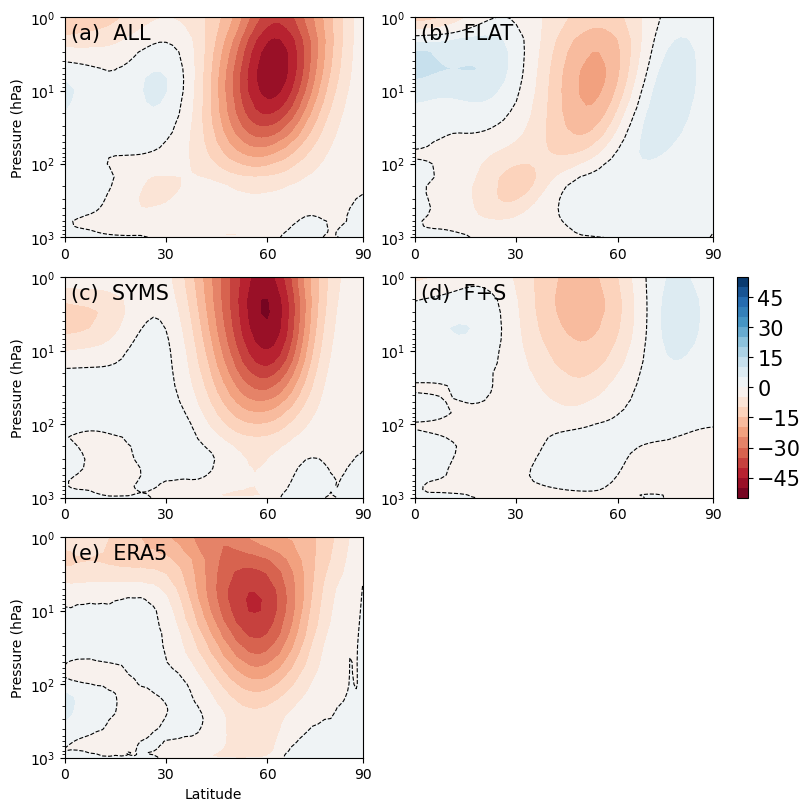

In [10]:
fig,ax = plot.subplots(3,2,figsize=(8,8),constrained_layout=True)
plot.rcParams['font.size'] = '15'



ax[0,0].set_ylim(1,10**3)
ax[1,0].set_ylim(1,10**3)
ax[0,1].set_ylim(1,10**3)
ax[1,1].set_ylim(1,10**3)

xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yyyy = [6,12,21,28,36]
yy = [850,500,200,30,1]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
#ax[0,0].set_xlabel('latitude')
ax[0,0].set_ylabel('Pressure (hPa)')
ax[0,0].text(1,2,'(a)  ALL')
ax[0,0].set_yscale("log")

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].text(1,2,'(b)  FLAT')
ax[0,1].set_yscale("log")

ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
#ax[0,0].set_xlabel('latitude')
ax[1,0].set_ylabel('Pressure (hPa)')
ax[1,0].text(1,2,'(c)  SYMS')
ax[1,0].set_yscale("log")

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
#ax[1,1].set_xlabel('Latitude')
ax[1,1].set_yscale("log")
ax[1,1].text(1,2,'(d)  F+S')

ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('Latitude')
ax[2,0].set_ylabel('Pressure (hPa)')
ax[2,0].text(1,2,'(e)  ERA5')
ax[2,0].set_yscale("log")


xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yy = [1,5,10,25,48]

x = np.arange(0,48,1)
y = plev/100
yy = level[::-1]#np.arange(0,37,1)

cl=np.arange(-55,60,5)

a1=ax[0,0].contourf(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=cl,cmap='RdBu')
a2=ax[0,1].contourf(x,y,upre[1,:,48:96]-up[1,:,48:96],levels=cl,cmap='RdBu')
a3=ax[1,0].contourf(x,y,upre[2,:,48:96]-up[2,:,48:96],levels=cl,cmap='RdBu')
a4=ax[1,1].contourf(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=cl,cmap='RdBu')
a5=ax[2,0].contourf(x,yy,uerare[:,48:96]-uera[:,48:96],levels=cl,cmap='RdBu')

ax[0,0].contour(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[0,1].contour(x,y,upre[1,:,48:96]-up[1,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[1,0].contour(x,y,upre[2,:,48:96]-up[2,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[1,1].contour(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[2,0].contour(x,yy,uerare[:,48:96]-uera[:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()
ax[2,0].invert_yaxis()


cbar=plot.colorbar(a4,ax=ax[1,1])#,ticks=[-1e6,0,1e6])

ax[2,1].axis('off')


plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/u_z.lat.png',dpi=600,bbox_inches='tight') 



# p1=ax[0,0].contourf(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
# cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-1e6,0,1e6])
# #cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


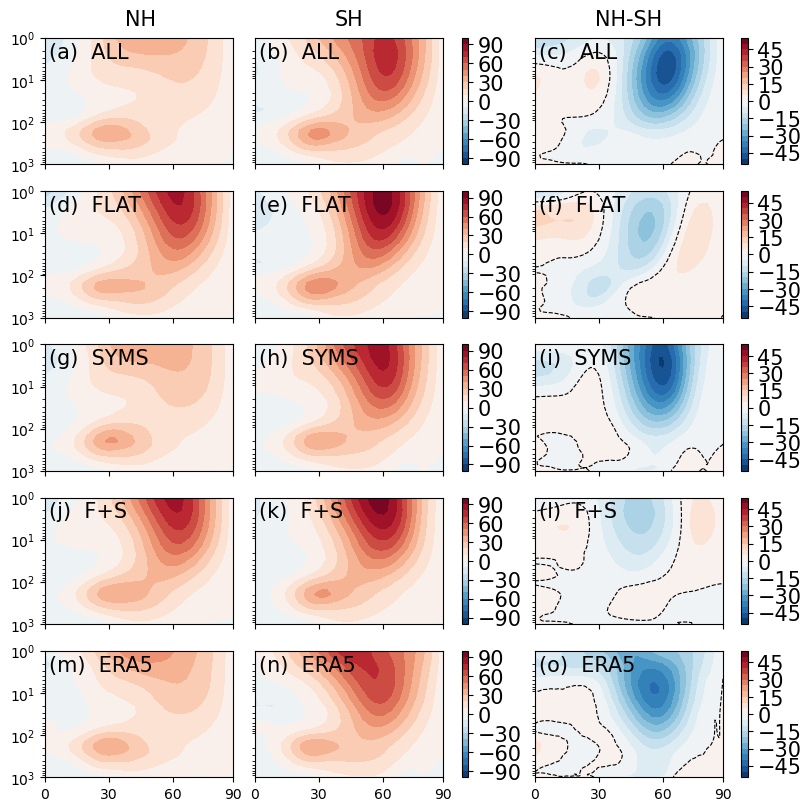

In [21]:
fig,ax = plot.subplots(5,3,figsize=(8,8),constrained_layout=True)
plot.rcParams['font.size'] = '15'


xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yyyy = [6,12,21,28,36]
yy = [850,500,200,30,1]

for i in range(5):
    for j in range(3):
        ax[i,j].set_ylim(1,10**3)
        ax[i,j].set_xticks(xxx)
        ax[i,j].set_xticklabels(xx)
        

for i in range(5):
    for j in range(3):
        ax[i,j].invert_yaxis()
        ax[i,j].set_yscale("log")

        
for i in range(5):
    for j in range(1,3):
        ax[i,j].set_yticks([])
        ax[i,j].set_yticklabels([])
        
for i in range(0,4):
    for j in range(3):
        #ax[i,j].set_xticks([])
        ax[i,j].set_xticklabels([])

ax[0,0].text(20,0.5,'NH')
ax[0,1].text(20,0.5,'SH')
ax[0,2].text(15,0.5,'NH-SH')
ax[0,0].text(1,3,'(a)  ALL')
ax[0,1].text(1,3,'(b)  ALL')
ax[0,2].text(1,3,'(c)  ALL')
ax[1,0].text(1,3,'(d)  FLAT')
ax[1,1].text(1,3,'(e)  FLAT')
ax[1,2].text(1,3,'(f)  FLAT')
ax[2,0].text(1,3,'(g)  SYMS')
ax[2,1].text(1,3,'(h)  SYMS')
ax[2,2].text(1,3,'(i)  SYMS')
ax[3,0].text(1,3,'(j)  F+S')
ax[3,1].text(1,3,'(k)  F+S')
ax[3,2].text(1,3,'(l)  F+S')
ax[4,0].text(1,3,'(m)  ERA5')
ax[4,1].text(1,3,'(n)  ERA5')
ax[4,2].text(1,3,'(o)  ERA5')
        
# #ax[0,0].set_xlabel('latitude')
# ax[0,0].set_ylabel('Pressure (hPa)')


# #ax[0,0].set_xlabel('latitude')
# ax[1,0].set_ylabel('Pressure (hPa)')



# #ax[1,1].set_xlabel('Latitude')


# ax[2,0].set_xlabel('Latitude')
# ax[2,0].set_ylabel('Pressure (hPa)')



xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yy = [1,5,10,25,48]

x = np.arange(0,48,1)
y = plev/100
yy = level[::-1]#np.arange(0,37,1)

cl=np.arange(-100,110,10)

a1=ax[0,0].contourf(x,y,upre[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,0].contourf(x,y,upre[1,:,48:96],levels=cl,cmap='RdBu_r')
a3=ax[2,0].contourf(x,y,upre[2,:,48:96],levels=cl,cmap='RdBu_r')
a4=ax[3,0].contourf(x,y,upre[3,:,48:96],levels=cl,cmap='RdBu_r')
a5=ax[4,0].contourf(x,yy,uerare[:,48:96],levels=cl,cmap='RdBu_r')



#cl=np.arange(-105,120,15)
cl=np.arange(-100,110,10)

a1=ax[0,1].contourf(x,y,up[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,1].contourf(x,y,up[1,:,48:96],levels=cl,cmap='RdBu_r')
a3=ax[2,1].contourf(x,y,up[2,:,48:96],levels=cl,cmap='RdBu_r')
a4=ax[3,1].contourf(x,y,up[3,:,48:96],levels=cl,cmap='RdBu_r')
a5=ax[4,1].contourf(x,yy,uera[:,48:96],levels=cl,cmap='RdBu_r')

cbar=plot.colorbar(a1,ax=ax[0,1])
cbar=plot.colorbar(a2,ax=ax[1,1])
cbar=plot.colorbar(a3,ax=ax[2,1])
cbar=plot.colorbar(a4,ax=ax[3,1])
cbar=plot.colorbar(a5,ax=ax[4,1])


cl=np.arange(-55,60,5)

a1=ax[0,2].contourf(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,2].contourf(x,y,upre[1,:,48:96]-up[1,:,48:96],levels=cl,cmap='RdBu_r')
a3=ax[2,2].contourf(x,y,upre[2,:,48:96]-up[2,:,48:96],levels=cl,cmap='RdBu_r')
a4=ax[3,2].contourf(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=cl,cmap='RdBu_r')
a5=ax[4,2].contourf(x,yy,uerare[:,48:96]-uera[:,48:96],levels=cl,cmap='RdBu_r')

cbar=plot.colorbar(a1,ax=ax[0,2])
cbar=plot.colorbar(a2,ax=ax[1,2])
cbar=plot.colorbar(a3,ax=ax[2,2])
cbar=plot.colorbar(a4,ax=ax[3,2])
cbar=plot.colorbar(a5,ax=ax[4,2])


ax[0,2].contour(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[1,2].contour(x,y,upre[1,:,48:96]-up[1,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[2,2].contour(x,y,upre[2,:,48:96]-up[2,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[3,2].contour(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[4,2].contour(x,yy,uerare[:,48:96]-uera[:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)

#ax[2,1].axis('off')


plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/u_z_all.lat.png',dpi=600,bbox_inches='tight') 



# p1=ax[0,0].contourf(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
# cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-1e6,0,1e6])
# #cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


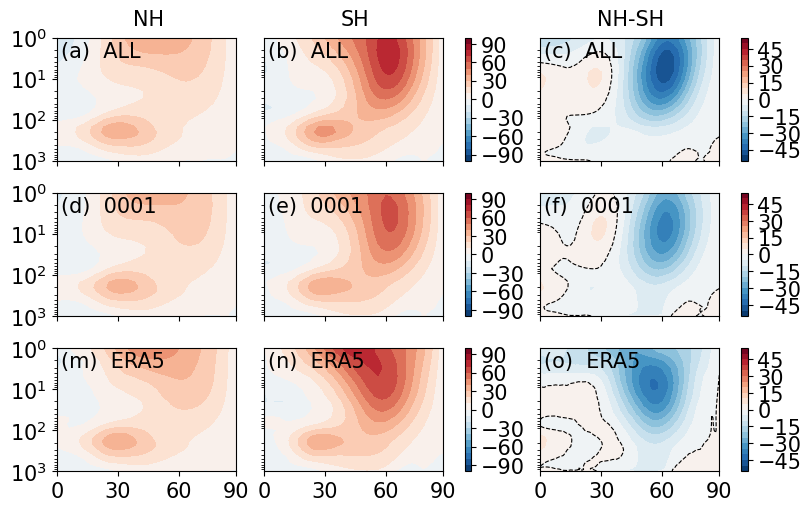

In [37]:
fig,ax = plot.subplots(3,3,figsize=(8,5),constrained_layout=True)
plot.rcParams['font.size'] = '15'


xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yyyy = [6,12,21,28,36]
yy = [850,500,200,30,1]

for i in range(3):
    for j in range(3):
        ax[i,j].set_ylim(1,10**3)
        ax[i,j].set_xticks(xxx)
        ax[i,j].set_xticklabels(xx)
        

for i in range(3):
    for j in range(3):
        ax[i,j].invert_yaxis()
        ax[i,j].set_yscale("log")

        
for i in range(3):
    for j in range(1,3):
        ax[i,j].set_yticks([])
        ax[i,j].set_yticklabels([])
        
for i in range(0,2):
    for j in range(3):
        #ax[i,j].set_xticks([])
        ax[i,j].set_xticklabels([])

ax[0,0].text(20,0.5,'NH')
ax[0,1].text(20,0.5,'SH')
ax[0,2].text(15,0.5,'NH-SH')
ax[0,0].text(1,3,'(a)  ALL')
ax[0,1].text(1,3,'(b)  ALL')
ax[0,2].text(1,3,'(c)  ALL')
ax[1,0].text(1,3,'(d)  0001')
ax[1,1].text(1,3,'(e)  0001')
ax[1,2].text(1,3,'(f)  0001')
# ax[2,0].text(1,3,'(g)  SYMS')
# ax[2,1].text(1,3,'(h)  SYMS')
# ax[2,2].text(1,3,'(i)  SYMS')
# ax[3,0].text(1,3,'(j)  F+S')
# ax[3,1].text(1,3,'(k)  F+S')
# ax[3,2].text(1,3,'(l)  F+S')
ax[2,0].text(1,3,'(m)  ERA5')
ax[2,1].text(1,3,'(n)  ERA5')
ax[2,2].text(1,3,'(o)  ERA5')
        
# #ax[0,0].set_xlabel('latitude')
# ax[0,0].set_ylabel('Pressure (hPa)')


# #ax[0,0].set_xlabel('latitude')
# ax[1,0].set_ylabel('Pressure (hPa)')



# #ax[1,1].set_xlabel('Latitude')


# ax[2,0].set_xlabel('Latitude')
# ax[2,0].set_ylabel('Pressure (hPa)')



xxx = [0,16,32,47]
xx = [0,30,60,90]
yyy = [2,6,10,15,22]
yy = [1,5,10,25,48]

x = np.arange(0,48,1)
y = plev/100
yy = level[::-1]#np.arange(0,37,1)

cl=np.arange(-100,110,10)

a1=ax[0,0].contourf(x,y,upre[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,0].contourf(x,y,upre0[:,48:96]/60,levels=cl,cmap='RdBu_r')
a3=ax[2,0].contourf(x,yy,uerare[:,48:96],levels=cl,cmap='RdBu_r')
# a4=ax[3,0].contourf(x,y,upre[3,:,48:96],levels=cl,cmap='RdBu_r')
# a5=ax[4,0].contourf(x,yy,uerare[:,48:96],levels=cl,cmap='RdBu_r')



#cl=np.arange(-105,120,15)
cl=np.arange(-100,110,10)

a1=ax[0,1].contourf(x,y,up[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,1].contourf(x,y,up0[:,48:96]/60,levels=cl,cmap='RdBu_r')
a3=ax[2,1].contourf(x,yy,uera[:,48:96],levels=cl,cmap='RdBu_r')
# a4=ax[3,1].contourf(x,y,up[3,:,48:96],levels=cl,cmap='RdBu_r')
# a5=ax[4,1].contourf(x,yy,uera[:,48:96],levels=cl,cmap='RdBu_r')

cbar=plot.colorbar(a1,ax=ax[0,1])
cbar=plot.colorbar(a2,ax=ax[1,1])
cbar=plot.colorbar(a3,ax=ax[2,1])
# cbar=plot.colorbar(a4,ax=ax[3,1])
# cbar=plot.colorbar(a5,ax=ax[4,1])


cl=np.arange(-55,60,5)

a1=ax[0,2].contourf(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=cl,cmap='RdBu_r')
a2=ax[1,2].contourf(x,y,upre0[:,48:96]/60-up0[:,48:96]/60,levels=cl,cmap='RdBu_r')
a3=ax[2,2].contourf(x,yy,uerare[:,48:96]-uera[:,48:96],levels=cl,cmap='RdBu_r')
# a4=ax[3,2].contourf(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=cl,cmap='RdBu_r')
# a5=ax[4,2].contourf(x,yy,uerare[:,48:96]-uera[:,48:96],levels=cl,cmap='RdBu_r')

cbar=plot.colorbar(a1,ax=ax[0,2])
cbar=plot.colorbar(a2,ax=ax[1,2])
cbar=plot.colorbar(a3,ax=ax[2,2])
# cbar=plot.colorbar(a4,ax=ax[3,2])
# cbar=plot.colorbar(a5,ax=ax[4,2])


ax[0,2].contour(x,y,upre[0,:,48:96]-up[0,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[1,2].contour(x,y,upre0[:,48:96]/60-up0[:,48:96]/60,levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
ax[2,2].contour(x,yy,uerare[:,48:96]-uera[:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
# ax[3,2].contour(x,y,upre[3,:,48:96]-up[3,:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)
# ax[4,2].contour(x,yy,uerare[:,48:96]-uera[:,48:96],levels=[0],colors='black',linestyles='dashed',linewidths=0.8)

#ax[2,1].axis('off')


#plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/u_z_all.lat.png',dpi=600,bbox_inches='tight') 



# p1=ax[0,0].contourf(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
# cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-1e6,0,1e6])
# #cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
# p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


In [ ]:
print(upre[0,17,80],up[0,17,80])
#print(upre[1,17,80],up[1,17,80])
print(upre[2,17,80],up[2,17,80])
#print(upre[3,17,80],up[3,17,80])
print(uerare[32,80],uera[32,80])

In [ ]:
uy = np.zeros((12,37,96))
for i in range(1979,2022):
    ncin1 = Dataset('era5/'+str(i)+'.nc', 'r', format='NETCDF4') 
    u = ncin1.variables['u'] 
    u = (np.array(u))
    uy = uy+np.mean(u,axis=3)/44
    print(i)


In [ ]:
uera=np.zeros((37,96))
uerare=np.zeros((37,96))
uera[:,0:48] = (np.mean(uy[10:12,:,0:48],axis=0)+np.mean(uy[0:3,:,0:48],axis=0))/2
uera[:,48:96] = np.mean(uy[4:9,:,48:96],axis=0)
uera=uera[::-1,:]
uerare = uera[:,::-1]

In [ ]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vtt_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


In [ ]:
np.mean(np.mean(-tpl[3,59:96,0:191]+tplre[3,59:96,0:191],axis=0),axis=0)

In [ ]:
np.mean(np.mean((tplre[0,59:96,0:191]),axis=0),axis=0)

In [ ]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,22,2)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,tpl[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,tpl[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,tpl[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.2,0.2)
cll = np.arange(-5,6,1)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,tpl[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,tpl[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,tpl[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-30,33,3)
cl1 = np.arange(-30,40,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(vt[0,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[0,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[0,59:96,0:191,8]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(vt[1,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[1,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[1,59:96,0:191,8]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(vt[2,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[2,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[2,59:96,0:191,8]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(vt[3,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[3,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[3,59:96,0:191,8]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

# ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_300.png',dpi=600,bbox_inches='tight') 



In [ ]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-30,33,3)
cll = np.arange(-30,40,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,vt[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,vt[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,vt[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


In [ ]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-70,72,2)
cl1 = np.arange(-70,75,20)

cl2 = np.arange(-30,32,2)
cl12 = np.arange(-30,35,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],cmap=reversed_map,levels=cl2,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=cl12,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],cmap=reversed_map,levels=cl2,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=cl12,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(vt[0,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[0,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[0,59:96,0:191,2]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(vt[1,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[1,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[1,59:96,0:191,2]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(vt[2,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[2,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[2,59:96,0:191,2]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(vt[3,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[3,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[3,59:96,0:191,2]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

# ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_850.png',dpi=600,bbox_inches='tight') 




In [ ]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-70,72,2)
cll = np.arange(-70,75,20)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,vt[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,vt[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,vt[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 
